In [4]:
#1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

#高斯函数
def gauss(x,mu,sigma):
    N,D = x.shape
    c1 = 1 / (2*np.pi)**(D/2)
    c2 = 1 / (np.linalg.det(sigma)**(1/2))
    
    inv_sigma = np.linalg.inv(sigma)
    c3 = x-mu
    c4 = np.dot(c3,inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:,d] * c3[:,d]
    
    p = c1 * c2 * np.exp(-c5/2)
    return p

In [7]:
#2
x = np.array([[1,2],[2,1],[3,4]])
mu = np.array([1,2])
sigma = np.array([[1,0],[0,1]])
print(gauss(x,mu,sigma))

[0.15915494 0.05854983 0.00291502]


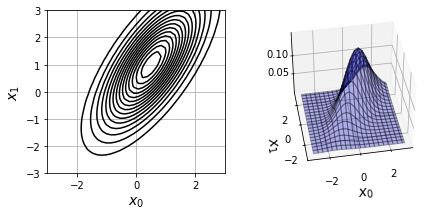

In [24]:
#3
X_range0 = [-3,3]
X_range1 = [-3,3]

#显示等高线
def show_contour_gauss(mu,sig):
    xn = 40 #等高线的分辨率
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    x = np.c_[xx0.reshape( xn * xn, 1), xx1.reshape(xn * xn, 1)]
    f = gauss(x,mu,sig)
    f = f.reshape(xn,xn)
    f = f.T
    cont = plt.contour(xx0,xx1,f,15,colors = 'k')
    plt.grid(True)
    
#三维图形
def show3d_gauss(ax,mu,sig):
    xn = 40 #等高线的分辨率
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    x = np.c_[xx0.reshape( xn * xn, 1), xx1.reshape(xn * xn, 1)]
    f = gauss(x,mu,sig)
    f = f.reshape(xn,xn)
    f = f.T
    ax.plot_surface(xx0,xx1,f,rstride=2,cstride=2,alpha=0.3,color='blue',edgecolor='black')
    
#主处理
mu = np.array([1,0.5])
sigma = np.array([[2,1],[1,1]])
Fig = plt.figure(1,figsize = (7,3))
Fig.add_subplot(1,2,1)
show_contour_gauss(mu,sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$',fontsize = 14)
plt.ylabel('$x_1$',fontsize = 14)
Ax = Fig.add_subplot(1,2,2,projection = '3d')
show3d_gauss(Ax,mu,sigma)
Ax.set_zticks([0.05,0.10])
Ax.set_xlabel('$x_0$',fontsize = 14)
Ax.set_ylabel('$x_1$',fontsize = 14)
Ax.view_init(40,-100)
plt.show()